In [1]:
###########################################################
# 데이터 전처리
###########################################################
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

train_datagen = ImageDataGenerator(rescale=1./255)  # 모든 이미지를 1/255로 스케일을 조정합니다
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "./datasets/train"
validation_dir = './datasets/validation'

train_generator = train_datagen.flow_from_directory( \
        train_dir,                  # 타깃 디렉터리
        target_size=(150, 150),     # 모든 이미지를 150 × 150 크기
        batch_size=20,
        class_mode='binary')        #

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


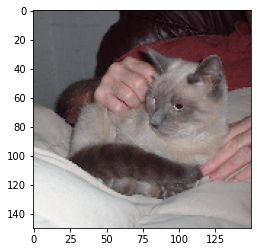

In [2]:
"제너레이터의 출력:  150 × 150  RGB "
"이미지의 배치((20, 150, 150, 3) 크기)와 이진 레이블의 배치((20,) 크기)  "
"각 배치에는 20개의 샘플(배치 크기)  "

for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)  #(20, 150, 150, 3)
    print('배치 레이블 크기:', labels_batch.shape) #(20,)
    break

import matplotlib.pyplot as plt
plt.imshow(  train_generator[0][0][0] )
plt.show()

In [3]:
###########################################################
# 학습
###########################################################
from k_cnn_n_cat_dog_model import makeModel
from tensorflow.keras.models import load_model

model =  makeModel()


import os 
if os.path.exists("k_model.h5") :
    model = load_model("k_model.h5")  
    
history = model.fit_generator(
      train_generator ,
      steps_per_epoch=50  ,
      epochs=50 ,
      validation_data=validation_generator,
      validation_steps=50)

model.save("k_model.h5") 

C:\Users\marbi\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
C:\Users\marbi\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
50/50 [==============================] - 13s 177ms/step - loss: 0.0319 - acc: 0.9920 - val_loss: 1.2459 - val_acc: 0.7260
Epoch 2/50
50/50 [==============================] - 6s 125ms/step - loss: 0.0316 - acc: 0.9940 - val_loss: 1.1018 - val_acc: 0.7280ss: 0.0198 - ETA: 0s - loss: 0.0198 - a
Epoch 3/50
50/50 [==============================] - 6s 122ms/step - loss: 0.0230 - acc: 0.9930 - val_loss: 1.2472 - val_acc: 0.7110
Epoch 4/50
50/50 [==============================] - 6s 126ms/step - loss: 0.0198 - acc: 0.9960 - val_loss: 1.1278 - val_acc: 0.7300 ETA: 0s - loss: 0.0194 - acc: 
Epoch 5/50
50/50 [==============================] - 7s 133ms/step - loss: 0.0349 - acc: 0.9920 - val_loss: 1.2052 - val_acc: 0.7300
Epoch 6/50
50/50 [==============================] - 7s 132ms/step - loss: 0.0282 - acc: 0.9930 - val_loss: 1.1892 - val_acc: 0.7220
Epoch 7/50
50/50 [==============================] - 7s 150ms/step - loss: 0.0187 - acc: 0.9950 - val_loss: 1.2774 - val_acc: 0.7300
Epoch

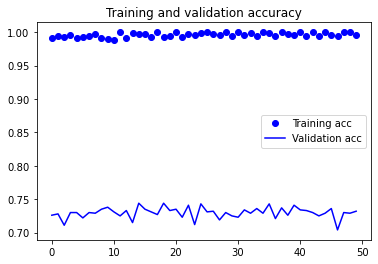

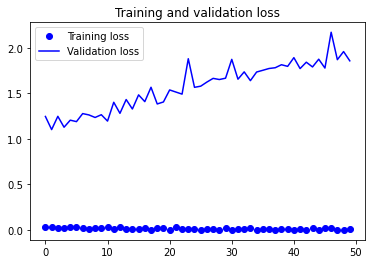

In [4]:
###########################################################
# 학습 결과 정확도 및 비용 그래프
###########################################################
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


[[6.3450934e-05]]


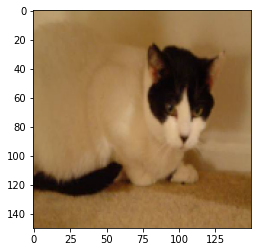

In [5]:
########################################################
import matplotlib.pyplot as plt 
print( model.predict( train_generator[10][0][0].reshape(-1,150,150,3) ))
plt.imshow(  train_generator[10][0][0]  )
plt.show()